# Block encoding of 2-D Laplacian matrix

## The representation of laplacian by linear combination of unitary
$L = 2 * P_0 + (-1) * P_1 + (-1) * P_3$

In [77]:
import numpy as np
from MyQuantum import *
import matplotlib.pyplot as plt

D = npk.Matrix(np.array([[2, -1, 0, -1],
                                [-1, 2, -1, 0],
                                [0, -1, 2, -1],
                                [-1, 0, -1, 2]]))
P0 = I_4
P1 = np.array([[0, 1, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1],
                [1, 0, 0, 0]])
P2 = P1 @ P1
P3 = P2 @ P1

print((2 * I_4 + (-1) * P1 + (-1) * P3))
print(D)
if np.allclose((2 * I_4 + (-1) * P1 + (-1) * P3), D):
    print("Laplacian is represented by linear combination of unitary correctly")

[[ 2.+0.j -1.+0.j  0.+0.j -1.+0.j]
 [-1.+0.j  2.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  2.+0.j -1.+0.j]
 [-1.+0.j  0.+0.j -1.+0.j  2.+0.j]]
[[ 2 -1  0 -1]
 [-1  2 -1  0]
 [ 0 -1  2 -1]
 [-1  0 -1  2]]
Laplacian is represented by linear combination of unitary correctly


## Corollary:
$$
L_2 = L \otimes I + I \otimes L \\
= 2 * P_0 \otimes I + (-1) * P_1 \otimes I + (-1) * P_3 \otimes I + I \otimes 2 * P_0 + I \otimes (-1) * P_1 + I \otimes (-1) * P_3 \\
= 2 * (P_0 \otimes I + I \otimes P_0) + (-1) * (P_1 \otimes I + I \otimes  P_1) + (-1) * (P_3 \otimes I + I \otimes P_3) \\
$$
So, what is $P_0 \otimes I + I \otimes 2 * P_0$ and so on? Could they be represented by some unitary matrices?

In [78]:
P0_term = np.kron(P0, I_4) + np.kron(I_4, P0)
print(P0_term.real)

[[2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]]


The term $P_0 \otimes I + I \otimes 2 * P_0$ is just twice the identity matrix
So the block encoding can be implemented in such a way:


[[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


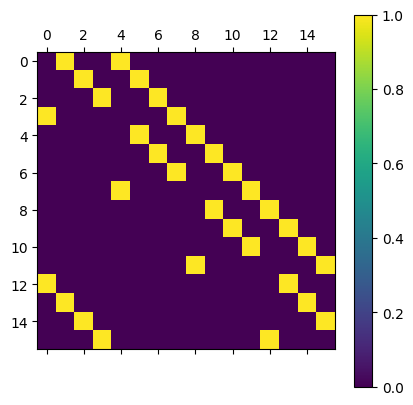

In [79]:
P1_term = np.kron(P1, I_4) + np.kron(I_4, P1)
print(P1_term.real)
plt.matshow(P1_term.real)
plt.colorbar()

Checl if this term is proportional to a unitary matrix

In [80]:
normalized_P1_term = P1_term / np.linalg.norm(P1_term,ord=2)
print((normalized_P1_term @ normalized_P1_term.T).real)
if np.allclose(normalized_P1_term @ normalized_P1_term.T, np.eye(16)):
    print("P1 term is proportional to a unitary matrix")
else:
    print("P1 term is not proportional to a unitary matrix")

[[0.5  0.   0.   0.   0.   0.   0.   0.25 0.   0.   0.   0.   0.   0.25
  0.   0.  ]
 [0.   0.5  0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.25 0.  ]
 [0.   0.   0.5  0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.25]
 [0.   0.   0.   0.5  0.   0.   0.25 0.   0.   0.   0.   0.   0.25 0.
  0.   0.  ]
 [0.   0.25 0.   0.   0.5  0.   0.   0.   0.   0.   0.   0.25 0.   0.
  0.   0.  ]
 [0.   0.   0.25 0.   0.   0.5  0.   0.   0.25 0.   0.   0.   0.   0.
  0.   0.  ]
 [0.   0.   0.   0.25 0.   0.   0.5  0.   0.   0.25 0.   0.   0.   0.
  0.   0.  ]
 [0.25 0.   0.   0.   0.   0.   0.   0.5  0.   0.   0.25 0.   0.   0.
  0.   0.  ]
 [0.   0.   0.   0.   0.   0.25 0.   0.   0.5  0.   0.   0.   0.   0.
  0.   0.25]
 [0.   0.   0.   0.   0.   0.   0.25 0.   0.   0.5  0.   0.   0.25 0.
  0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.25 0.   0.   0.5  0.   0.   0.25
  0.   0.  ]
 [0.   0.   0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.5  0.   0.
  0.25 0.  ]


[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]]


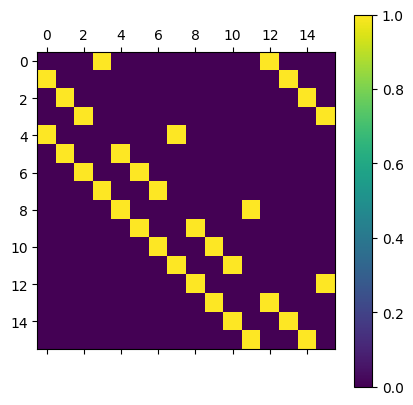

In [81]:
P3_term = np.kron(P3, I_4) + np.kron(I_4, P3)
print(P3_term.real)
plt.matshow(P3_term.real)
plt.colorbar()

This is not a unitary matrix since it is symmetric to $P_1$ term.

The result looks bad but P1 term and P3 term looks symmetric.
Let's try to add them together and see what happens.

[[0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0.]]


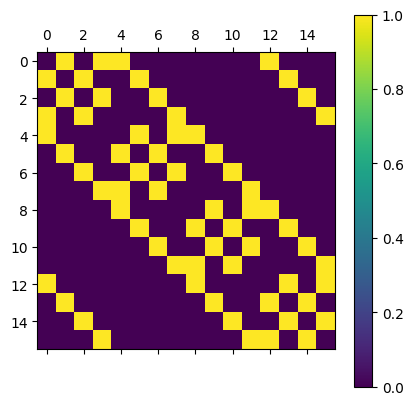

In [82]:
P1_P3_term = P1_term + P3_term
print(P1_P3_term.real)
plt.matshow(P1_P3_term.real)
plt.colorbar()

## Result
$$
L2 = 2 * (2 * I) + (-1) P1\&P3term\\
= 4 * I - P1\&P3_term
$$

Now check if $P_1 \& P_3$ term is proportional to the a unitary matrix

In [83]:
normalized_P1_P3_term = P1_P3_term / np.linalg.norm(P1_P3_term,ord=2)
print((normalized_P1_P3_term @ normalized_P1_P3_term.T).real)
if np.allclose(normalized_P1_P3_term @ normalized_P1_P3_term.T, np.eye(16)):
    print("P1&P3 term is proportional to a unitary matrix")
else:
    print("P1&P3 term is not proportional to a unitary matrix")

[[0.25  0.    0.125 0.    0.    0.125 0.    0.125 0.125 0.    0.    0.
  0.    0.125 0.    0.125]
 [0.    0.25  0.    0.125 0.125 0.    0.125 0.    0.    0.125 0.    0.
  0.125 0.    0.125 0.   ]
 [0.125 0.    0.25  0.    0.    0.125 0.    0.125 0.    0.    0.125 0.
  0.    0.125 0.    0.125]
 [0.    0.125 0.    0.25  0.125 0.    0.125 0.    0.    0.    0.    0.125
  0.125 0.    0.125 0.   ]
 [0.    0.125 0.    0.125 0.25  0.    0.125 0.    0.    0.125 0.    0.125
  0.125 0.    0.    0.   ]
 [0.125 0.    0.125 0.    0.    0.25  0.    0.125 0.125 0.    0.125 0.
  0.    0.125 0.    0.   ]
 [0.    0.125 0.    0.125 0.125 0.    0.25  0.    0.    0.125 0.    0.125
  0.    0.    0.125 0.   ]
 [0.125 0.    0.125 0.    0.    0.125 0.    0.25  0.125 0.    0.125 0.
  0.    0.    0.    0.125]
 [0.125 0.    0.    0.    0.    0.125 0.    0.125 0.25  0.    0.125 0.
  0.    0.125 0.    0.125]
 [0.    0.125 0.    0.    0.125 0.    0.125 0.    0.    0.25  0.    0.125
  0.125 0.    0.125 0.   ]
 [0.    

So, $ P_1 \& P_3 $ term is not a unitary matrix or a scaled unitary matrix.

### Need more property of this matrix.

Can we make it a summation of a banded, circulant and symmetric matrix or toeplitz matrix, or any easier structure can be used to implement?

[[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]]
[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.

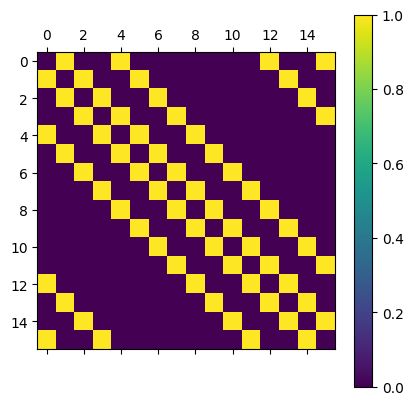

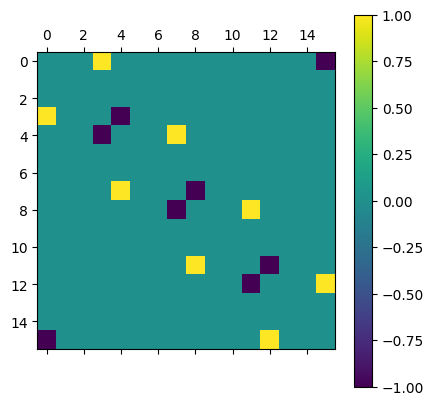

In [85]:
identical_banded_P1_P3_term = np.array([
    [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
    [1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
    [0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
    [0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
    [1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
    [0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
    [0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
    [0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
    [0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.],
    [0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.],
    [0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.],
    [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1.],
    [1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.],
    [0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.],
    [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.],
    [1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.]
])
print(identical_banded_P1_P3_term)
plt.matshow(identical_banded_P1_P3_term)
plt.colorbar()

complement_banded_P1_P3_term = P1_P3_term - identical_banded_P1_P3_term
print(complement_banded_P1_P3_term.real)
plt.matshow(complement_banded_P1_P3_term.real)
plt.colorbar()

This shows that the matrix can be represented by a b,c,s matrix and a complement matrix which is very sparse.
Then, with this idea, what is needed is (1) the implementation of banded, circulant, and symmetric matrix and (2) the implementation of the complement matrix (3) the addition of these two matrices.(1) is known and can be implemented by the LCU,

## Specific implementation for the banded, circulant, and symmetric matrix part
(Comin soon)

## implementation for the complement, sparce matrix part
For this kind of 

## Another idea
Can we use smaller fine-strucutre matrices to represent the larger matrix?
For example:
Could we find A, B, C, D, E, F that is fine-structured matrices such that
$$
P_1 \& P_3 = \begin{bmatrix}
A & B \\
B & C
\end{bmatrix} + \begin{bmatrix}
D & E \\
E & F
\end{bmatrix}
$$